In [197]:
from sklearn.datasets import make_blobs

# Generate 400 rows of data with 2 features and 2 centers (clusters)
features, labels = make_blobs(
    n_samples=400,
    centers=[(2, 2), (5, 5)], # Approximate centers based on your image
    n_features=2,
    cluster_std=1.5,          # Spread of the dots
    random_state=42
)

# Create the DataFrame
data = pd.DataFrame(features, columns=['feature1', 'feature2'])
data['label'] = labels

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
#data = pd.read_csv('../../../Downloads/data_2 - Sheet1.csv')

In [203]:
x_train = data[['feature1', 'feature2']].values
y_train = data['label'].values

m, n = x_train.shape

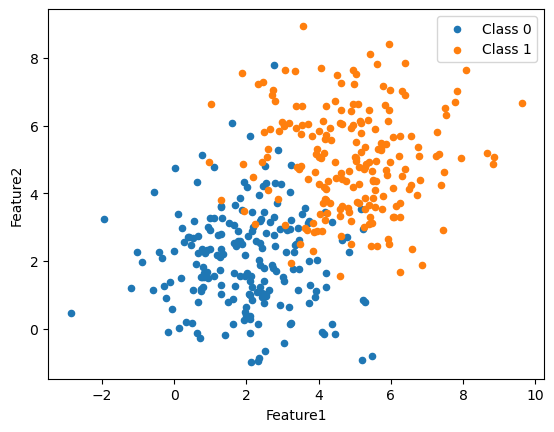

In [206]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = 'tab:blue', label = 'Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = 'tab:orange', label = 'Class 1', s=20)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

In [209]:
# ============================================================
# STEP 1: SIGMOID FUNCTION (Activation/Probability Converter)
# ============================================================
def sigmoid(z):
    # Converts any number to a probability between 0 and 1
    return 1 / (1 + np.exp(-z))


In [211]:
# ============================================================
# STEP 2: COST FUNCTION (Error Measurement Tool)
# ============================================================
def cost_function(x, y, w, b):
    # Initialize: Start with zero total error
    cost_sum = 0
    
    # Loop through all training examples
    for i in range(m):
        # A. Calculate the weighted sum (linear combination)
        z = np.dot(w, x[i]) + b
        
        # B. Convert to probability using sigmoid
        g = sigmoid(z)

        # C. Calculate the error for this example (log loss formula)
        cost_sum += -y[i] * np.log(g) - (1- y[i]) * np.log(1 - g)

    # D. Return the average error across all examples
    return (1 / m) * cost_sum  # NOTE: Should be (1/m) not (i/m)

In [213]:
# ============================================================
# STEP 3: GRADIENT FUNCTION (Direction Calculator)
# ============================================================
def gradient_function(x, y, w, b):
    # Initialize: Start with zero gradients
    grad_w = np.zeros(n)  # Gradient for weights
    grad_b = 0            # Gradient for bias
    
    # Loop through all training examples
    for i in range(m):
        # A. Calculate the weighted sum
        z = np.dot(w, x[i]) + b
        
        # B. Convert to probability
        g = sigmoid(z)

        # C. Calculate the error (difference between prediction and actual)
        error = (g - y[i])
        
        # D. Accumulate gradient for bias
        grad_b += error
        
        # E. Accumulate gradient for each weight (feature)
        for j in range(n):
            grad_w[j] += error * x[i, j]

    # F. Average the gradients across all examples
    grad_b = (1 / m) * grad_b
    grad_w = (1 / m) * grad_w

    # G. Return the directions to move
    return grad_b, grad_w

In [215]:
# ============================================================
# STEP 4: GRADIENT DESCENT (The Training Loop - THE HEART)
# ============================================================
def gradient_descent(x, y, alpha, iterations):
    # Initialize: Start with random guesses (zeros)
    w = np.zeros(n)  # Weights start at 0
    b = 0            # Bias starts at 0

    # THE LEARNING LOOP: Repeat many times
    for i in range(iterations):
        # A. Calculate which direction to move (using gradients)
        grad_b, grad_w = gradient_function(x, y, w, b)

        # B. Update weights (take a step downhill)
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # C. Every 1000 iterations, print progress
        if i % 1000 == 0:
            print(f"iteration {i}: Cost {cost_function(x, y, w, b)}")

    # D. Return the final "smart" weights
    return w, b

In [217]:
# ============================================================
# STEP 5: PREDICT FUNCTION (Decision Maker)
# ============================================================
def predict(x, w, b):
    # Initialize: Create empty predictions array
    preds = np.zeros(m)

    # Loop through all examples
    for i in range(m):
        # A. Calculate weighted sum
        z = np.dot(w, x[i]) + b
        
        # B. Convert to probability
        g = sigmoid(z)
        
        # C. Make hard decision: 1 if >= 50%, else 0
        preds[i] = 1 if g >= 0.5 else 0

    # D. Return all predictions
    return preds

In [229]:
# ============================================================
# MAIN EXECUTION: THE BEGINNING OF THE WORKFLOW
# ============================================================

# Set hyperparameters
learning_rate = 0.1   # How big each step is
iterations = 10000     # How many times to repeat

# >>> START: Train the model (this is where learning happens)
final_w, final_b = gradient_descent(x_train, y_train, learning_rate, iterations)

# >>> FINISH: Use the trained model to make predictions
predictions = predict(x_train, final_w, final_b)

# >>> EVALUATE: Check how well it did
accuracy = np.mean(predictions == y_train) * 100
print(f"training accuracy: {accuracy:.2f}%")

iteration 0: Cost 0.6270437044365786
iteration 1000: Cost 0.22430823653099363
iteration 2000: Cost 0.2001701229363403
iteration 3000: Cost 0.19249198630842582
iteration 4000: Cost 0.18910639339088012
iteration 5000: Cost 0.18737537745167818
iteration 6000: Cost 0.18641234104262683
iteration 7000: Cost 0.18584680158689212
iteration 8000: Cost 0.18550213751914446
iteration 9000: Cost 0.18528640806179805
training accuracy: 91.00%


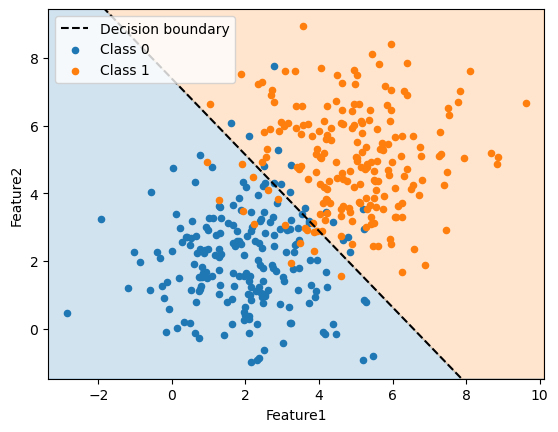

In [232]:
m = -final_w[0] / final_w[1]
c = -final_b / final_w[1]

xmin, xmax = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
ymin, ymax = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, 'k', ls = '--', label = 'Decision boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = 'tab:blue', label = 'Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = 'tab:orange', label = 'Class 1', s=20)
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()